In [3]:
import torch.nn.functional as F
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torchvision import transforms, datasets

from classifiers.externalGAN import Discriminator, Generator
from data_utils_NerveNet import SegmentationData
from solver_externalGAN import Solver
import transform_utils_NerveNet as tu
from dice_loss import DiceLoss

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_transform = transforms.Compose([
        transforms.Resize([128, 128])
        #transforms.RandomHorizontalFlip(),
        #transforms.RandomVerticalFlip()
    ])

train_data = SegmentationData(image_paths_file='../data/clean_no_zero_full_dataset_1300.txt', transform = data_transform, mode = 'train')
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=1,
                                           shuffle=True,
                                           num_workers=4)

val_data = SegmentationData(image_paths_file='../data/clean_no_zero_full_dataset_1300.txt', transform = data_transform, mode = 'val')
val_loader = torch.utils.data.DataLoader(val_data,
                                           batch_size=1,
                                           shuffle=True,
                                           num_workers=4)

In [3]:
model_DNet = DiscriminatorNET(num_classes = 2, in_channels = 1, weight_scale = 0.01, dropout = 0.05)
model_GNet = GeneratorNET(num_classes = 2, in_channels = 1, weight_scale = 0.01, dropout = 0.05)
#model_NerveNet = torch.load('models/NerveNet_binary_input128_clear38_10_10_epochs_lr0.00025_cw0.25.model')

#if torch.cuda.is_available():
#    model_NerveNet = model_NerveNet.cuda()
    
#model_NerveNet.eval()
#noise = Variable(torch.randn(128*128, 1))
#noise = noise.cuda()
#noise = noise.view(-1)
#output = model_GNet(noise)
#channel2 = output[:,0,:,:]
#channel2 = channel2.cpu()
#channel2 = channel2.view(128,128)
#print(channel2.size())
#plt.imshow(channel2.data.numpy())
#plt.show()

/home/michael_deistler95/project/nerve_segmentation/solver_gan.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/michael_deistler95/anaconda3/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/michael_deistler95/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/michael_deistler95/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/michael_deistler95/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/home/michael_deistler95/anaconda3/lib/python3.5/site-pa

Using Cuda
START TRAIN.


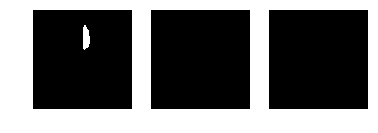

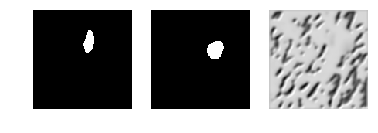

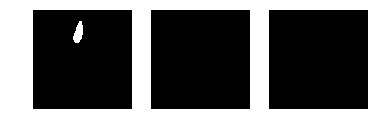

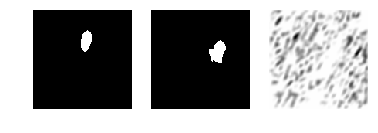

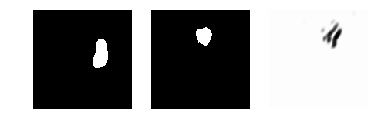

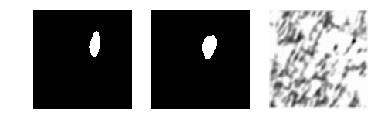

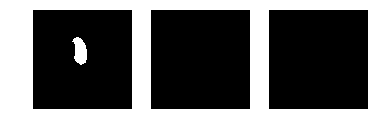

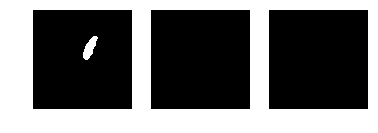

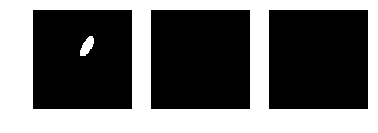

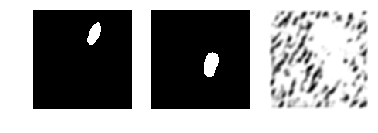

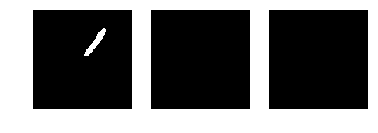

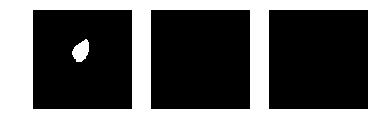

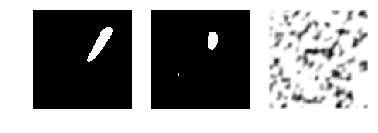

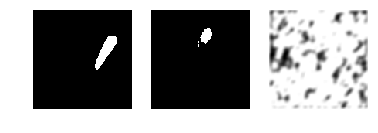

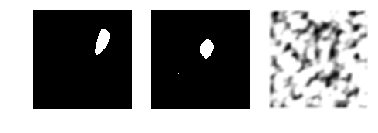

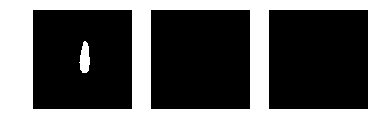

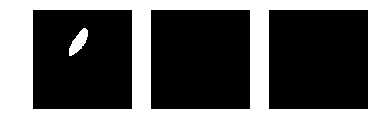

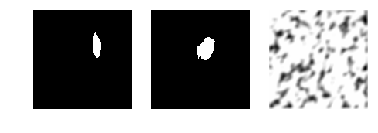

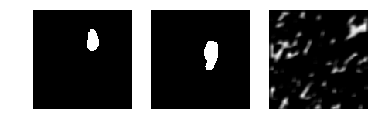

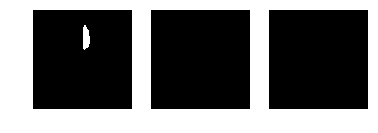

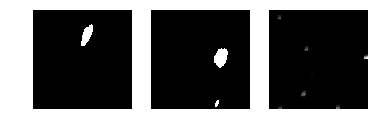

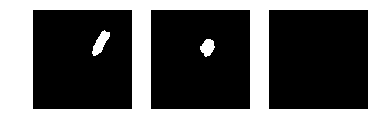

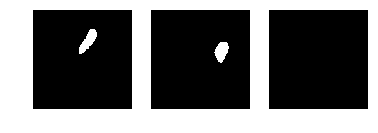

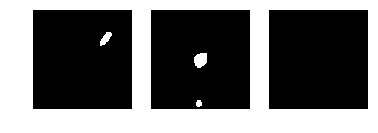

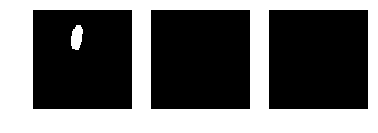

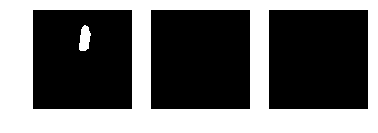

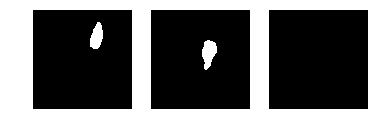

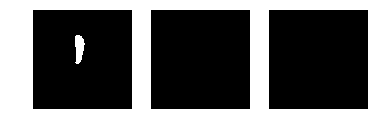

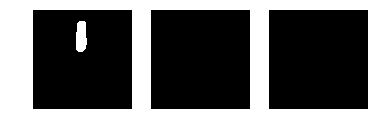

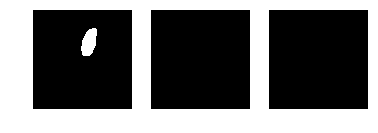

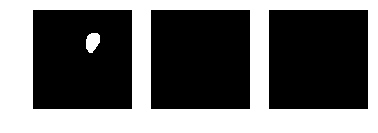

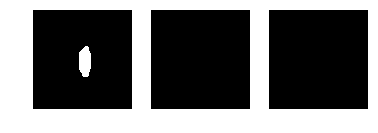

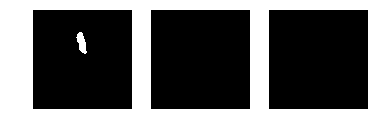

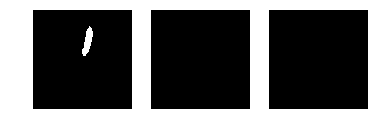

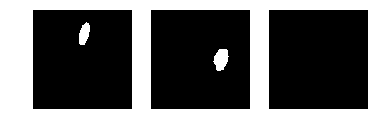

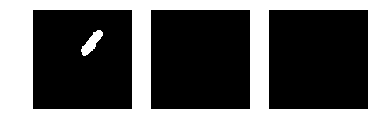

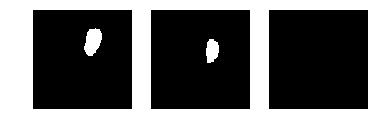

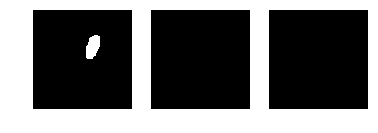

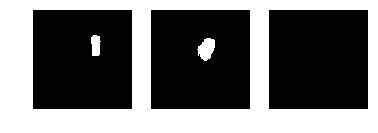

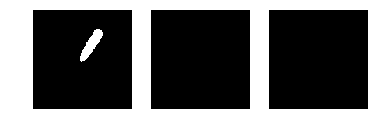

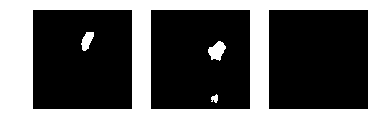

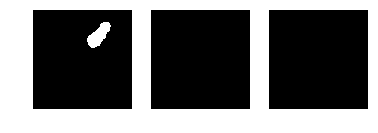

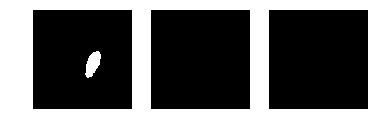

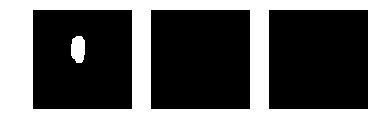

Process Process-107:
Process Process-108:
Process Process-106:
Process Process-105:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/michael_deistler95/anaconda3/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/michael_deistler95/anaconda3/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/home/michael_deistler95/anaconda3/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/michael_deistler95/anaconda3/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/michael_deistler95/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/michael_deistler95/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, *

KeyboardInterrupt: 

  File "/home/michael_deistler95/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py", line 917, in _open
    self._seek(0)
  File "/home/michael_deistler95/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py", line 974, in _seek
    self.tag_v2.load(self.fp)
  File "/home/michael_deistler95/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py", line 685, in load
    fp.seek(here)
KeyboardInterrupt


In [20]:
solver = Solver(optim_args={"lr": 0.002, #0.0025, #1.e-3, #1.e-2
                            "betas": (0.9, 0.999),
                            "eps": 1e-8,
                            "weight_decay": 0.001},#discriminator
                loss_func = torch.nn.BCELoss())

solver.train(model_DNet, model_GNet, train_loader, val_loader, log_nth=100, num_epochs=10)

In [ ]:
plt.figure(1)
A = np.random.rand(5, 5)
plt.imshow(A, interpolation='nearest')
plt.grid(True)
plt.show()
#import scipy.misc
#import uuid
#for i in range(2):
#    outfile = 'image%s.jpg' % (str(i))
#    scipy.misc.imsave(outfile, A)

In [19]:
model_DNet.save('/home/michael_deistler95/project/nerve_segmentation/model_DNet2.model')
model_GNet.save('/home/michael_deistler95/project/nerve_segmentation/model_GNet2.model')

Saving model... /home/michael_deistler95/project/nerve_segmentation/model_DNet2.model
Saving model... /home/michael_deistler95/project/nerve_segmentation/model_GNet2.model


In [ ]:
model_GNet.eval()
noise = Variable(torch.randn(128*128, 1))
noise = noise.cuda()
noise = noise.view(-1)
output = model_GNet(noise)
channel2 = output[:,0,:,:]
channel2 = channel2.cpu()
channel2 = channel2.view(128,128)
print(channel2.size())
plt.imshow(channel2.data.numpy())
plt.show()


#prob,output = torch.max(output,1)
#prob = prob.cpu()
#prob = prob.view(128,128)
#print(prob.size())
#plt.imshow(prob.data.numpy())
#plt.show()

In [ ]:
test_data_transform = transforms.Compose([
        transforms.Resize([128, 128])
    ])


test_data = SegmentationData(image_paths_file='../data/clean_no_zero_full_dataset_12.txt',  transform = data_transform, mode = 'test')
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=1)

In [ ]:
img, target = test_data[5]

inputs = img.unsqueeze(0)
inputs = Variable(inputs)

outputs = model.forward(inputs)
_, preds = torch.max(outputs, 1)
pred = preds[0].data.cpu()

img=np.squeeze(img)
target = target.numpy()
pred = pred.numpy()

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(target)
ax[1].axis('off')
ax[2].imshow(pred)
ax[2].axis('off')
plt.show()

In [ ]:
num_example_imgs = 4
indices = np.random.randint(test_data.__len__(), size = num_example_imgs)
plt.figure(figsize=(15, 5 * num_example_imgs))
for i, (img, target) in enumerate(test_data[20:24]):

    inputs = img.unsqueeze(0)
    inputs = Variable(inputs)
    
    outputs = model.forward(inputs)
    _, preds = torch.max(outputs, 1)
    pred = preds[0].data.cpu()
    
    img=np.squeeze(img)
    target = target.numpy()
    pred = pred.numpy()
    
    # img
    plt.subplot(num_example_imgs, 3, i * 3 + 1)
    plt.axis('off')
    plt.imshow(img)
    if i == 0:
        plt.title("Input image")
    
    # target
    plt.subplot(num_example_imgs, 3, i * 3 + 2)
    plt.axis('off')
    plt.imshow(target)
    if i == 0:
        plt.title("Target image")

    # pred
    plt.subplot(num_example_imgs, 3, i * 3 + 3)
    plt.axis('off')
    plt.imshow(pred)
    if i == 0:
        plt.title("Prediction image")
    
plt.show()

In [ ]:
test_scores = []
model.eval()
for inputs, targets in test_loader:
    inputs, targets = Variable(inputs), Variable(targets)
    if model.is_cuda:
        inputs, targets = inputs.cuda(), targets.cuda()
    
    outputs = model.forward(inputs)
    _, preds = torch.max(outputs, 1)
    targets_mask = targets >= 0
    test_scores.append(dice_coefficient(np.squeeze(targets.data.numpy()), np.squeeze(preds.data.numpy())))#np.mean((preds == targets)[targets_mask].data.cpu().numpy()))
    
model.train()
np.mean(test_scores)

In [ ]:
np.unique(test_scores)

In [ ]:
def dice_coefficient(ground_truth, predicted):
    gt = ground_truth
    p = predicted
    if np.sum(p) + np.sum(gt) == 0:
        return 1
    else:
        dice = np.sum(p[gt==1])*2.0 / (np.sum(p) + np.sum(gt))
        return dice